In [1]:
import numpy as np
import pylab as pl
import time
from IPython.display import display
from IPython.display import clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1=np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

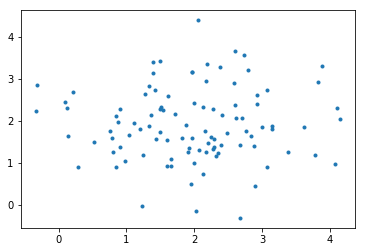

In [6]:
pl.plot(random_2[0], random_2[1],'.')

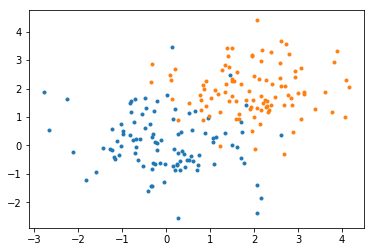

In [7]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')

In [8]:
clusters=2

In [9]:
random_stack = np.hstack([random_1, random_2])

In [17]:
min(random_stack[0]), max(random_stack[0])

centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

Text(0,0.5,'y')

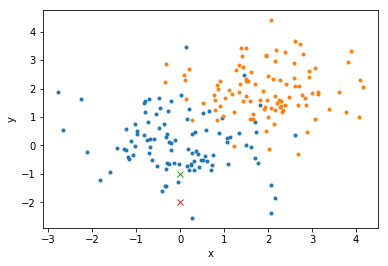

In [18]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.plot(centers[0,0], centers[0,1],'x')
pl.plot(centers[1,0], centers[1,1],'x')
pl.xlabel('x')
pl.ylabel('y')

In [19]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [20]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])


In [21]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 0.96972306,  1.06522176],
        [ 1.02400655, -2.10176012]]))

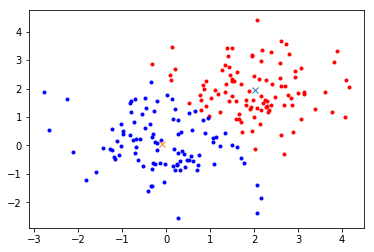

[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


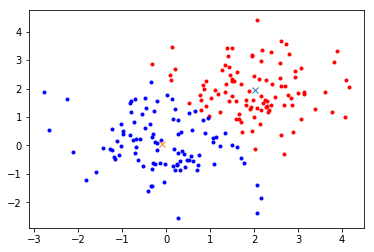

array([ 2.01522567,  1.93589473])

In [22]:
it = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
l3, = ax.plot(centers[0,0], centers[0,1], 'x')
l4, = ax.plot(centers[1,0], centers[1,1], 'x')

display(fig)

while (not (centers == newc).all()) or it > 10:
    print(it)
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                  np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    print (centers, newc)
    it += 1

plt.show()
newc[0]